In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
import matplotlib.cm as cm
import math
import pickle as pkl
import matplotlib.pyplot as plt
# Single methods
from sklearn.preprocessing import MinMaxScaler as Normalizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from Modules.Clustering_Utils_Zamuro import plot_silhouette
from Modules.Clustering_Utils_Zamuro import plot_centroids
from Modules.Clustering_Utils_Zamuro import ClusteringResults
from sklearn.metrics import davies_bouldin_score as DB
from sklearn.metrics import calinski_harabasz_score as CH

import warnings
warnings.filterwarnings("ignore")

import random
def _set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).
 
    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if torch.cuda.is_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
_set_seed(1024)

root = "/home/mirp_ai/Documents/Daniel_Nieto/PhD/AutoEncoders_Ecoacoustics"

## Kmeans Normal Results

In [3]:
day = 3
with open(f"temporal_zamuro/zamuro_clustering_results/AE/Kmeans_Normal/{day}silhouette_n-clusters_33", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/AE/Kmeans_Normal/{day}DB_n-clusters_33", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/AE/Kmeans_Normal/{day}CH_n-clusters_33", "rb") as file:
    ch = pkl.load(file)

silhouette_reshape = [[x] for x in silhouette]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
db_reshape = [[x] for x in db]
db_norm = Normalizer().fit_transform(db_reshape)
db_norm = 1-db_norm
ch_reshape = [[x] for x in ch]
ch_norm = Normalizer().fit_transform(ch_reshape)

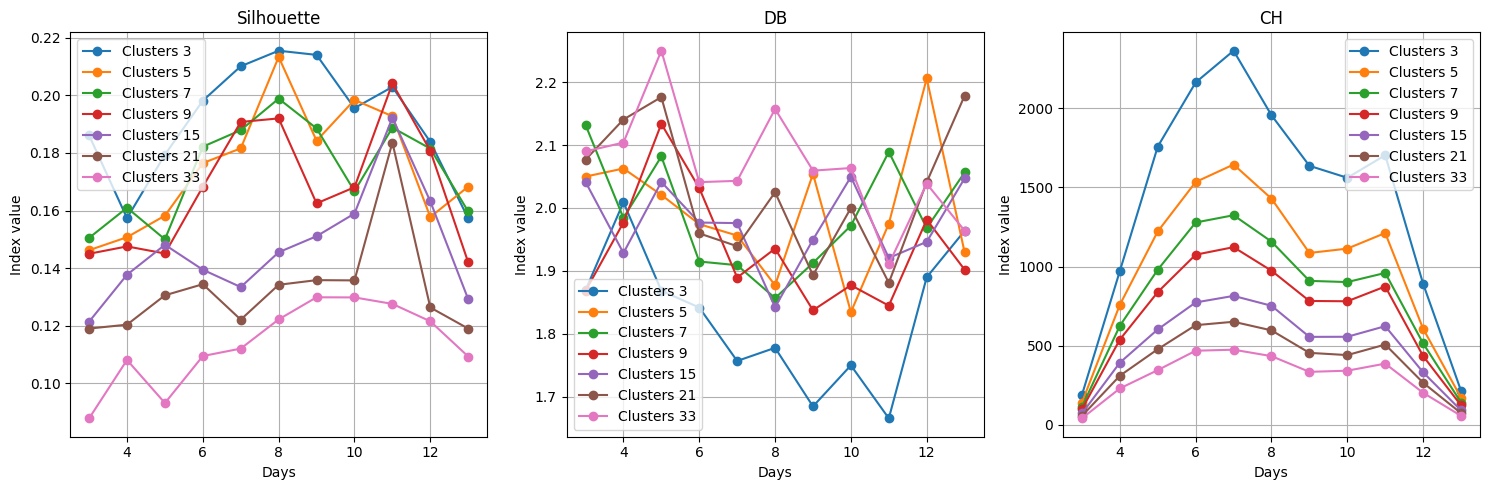

In [13]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# Días del experimento
days = list(range(3, 14))  # Días del 3 al 13

# Diccionarios para almacenar los resultados por número de clusters
silhouette_results = {}
db_results = {}
ch_results = {}

# Leer los datos
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/silhouette_n-clusters_33", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/DB_n-clusters_33", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/CH_n-clusters_33", "rb") as file:
        ch = pkl.load(file)
    
    # Almacenar los valores por número de clusters
    for i, n_clusters in enumerate([3, 5, 7, 9, 15, 21, 33]):  # Ajusta según corresponda
        silhouette_results.setdefault(n_clusters, []).append(silhouette[i])
        db_results.setdefault(n_clusters, []).append(db[i])
        ch_results.setdefault(n_clusters, []).append(ch[i])

# Función para calcular estadísticas
def calculate_statistics(data):
    stats = {}
    for n_clusters, values in data.items():
        values = np.array(values)
        stats[n_clusters] = {
            "mean": np.mean(values),
            "median": np.median(values),
            "std": np.std(values),
            "min": np.min(values),
            "max": np.max(values)
        }
    return stats

# Calcular estadísticas por número de clusters
silhouette_stats = calculate_statistics(silhouette_results)
db_stats = calculate_statistics(db_results)
ch_stats = calculate_statistics(ch_results)

# Graficar las métricas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = [(silhouette_results, "Silhouette"), (db_results, "DB"), (ch_results, "CH")]

for ax, (results, title) in zip(axes, metrics):
    for n_clusters, values in results.items():
        ax.plot(days, values, marker='o', label=f'Clusters {n_clusters}')
    ax.set_title(title)
    ax.set_xlabel("Days")
    ax.set_ylabel("Index value")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


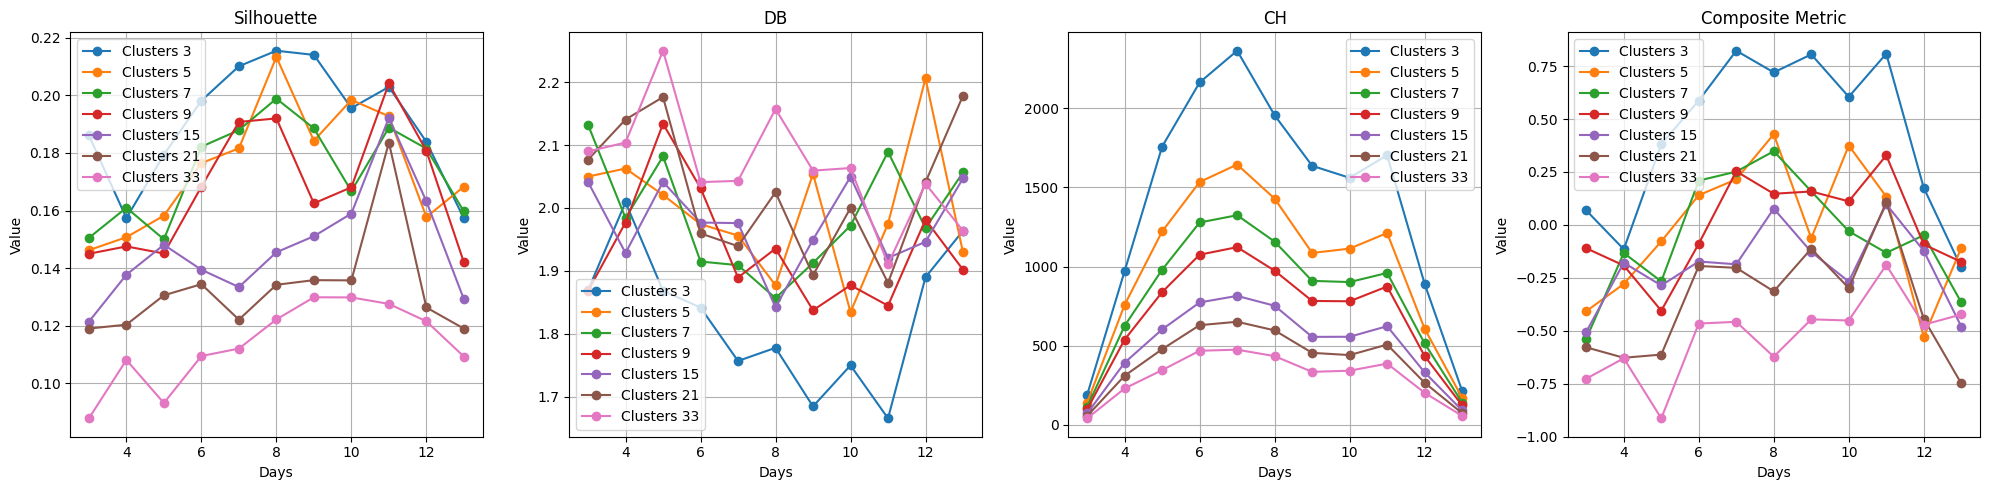

In [14]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

# Días del experimento
days = list(range(3, 14))  # Días del 3 al 13

# Diccionarios para almacenar los resultados por número de clusters
silhouette_results = {}
db_results = {}
ch_results = {}

# Leer los datos
for day in days:
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/silhouette_n-clusters_33", "rb") as file:
        silhouette = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/DB_n-clusters_33", "rb") as file:
        db = pkl.load(file)
    with open(f"temporal_zamuro/zamuro_clustering_results/Days_Results/AE/Kmeans_Normal/{day}/CH_n-clusters_33", "rb") as file:
        ch = pkl.load(file)
    
    # Almacenar los valores por número de clusters
    for i, n_clusters in enumerate([3, 5, 7, 9, 15, 21, 33]):  # Ajusta según corresponda
        silhouette_results.setdefault(n_clusters, []).append(silhouette[i])
        db_results.setdefault(n_clusters, []).append(db[i])
        ch_results.setdefault(n_clusters, []).append(ch[i])

# Función para calcular estadísticas
def calculate_statistics(data):
    stats = {}
    for n_clusters, values in data.items():
        values = np.array(values)
        stats[n_clusters] = {
            "mean": np.mean(values),
            "median": np.median(values),
            "std": np.std(values),
            "min": np.min(values),
            "max": np.max(values)
        }
    return stats

# Normalizar los valores
def normalize(data):
    all_values = np.concatenate(list(data.values()))
    min_val, max_val = np.min(all_values), np.max(all_values)
    return {k: (np.array(v) - min_val) / (max_val - min_val) for k, v in data.items()}

# Calcular estadísticas por número de clusters
silhouette_stats = calculate_statistics(silhouette_results)
db_stats = calculate_statistics(db_results)
ch_stats = calculate_statistics(ch_results)

# Normalizar las métricas
silhouette_norm = normalize(silhouette_results)
db_norm = normalize(db_results)
ch_norm = normalize(ch_results)

# Calcular métrica compuesta
composite_metric = {}
for n_clusters in silhouette_norm:
    composite_metric[n_clusters] = (silhouette_norm[n_clusters] + ch_norm[n_clusters]) / 2 - db_norm[n_clusters]

# Graficar las métricas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
metrics = [(silhouette_results, "Silhouette"), (db_results, "DB"), (ch_results, "CH"), (composite_metric, "Composite Metric")]

for ax, (results, title) in zip(axes, metrics):
    for n_clusters, values in results.items():
        ax.plot(days, values, marker='o', label=f'Clusters {n_clusters}')
    ax.set_title(title)
    ax.set_xlabel("Days")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [6]:
silhouette_norm

array([[1.        ],
       [0.76689124],
       [0.28904295],
       [0.21082977],
       [0.00518345],
       [0.16998475],
       [0.        ]])

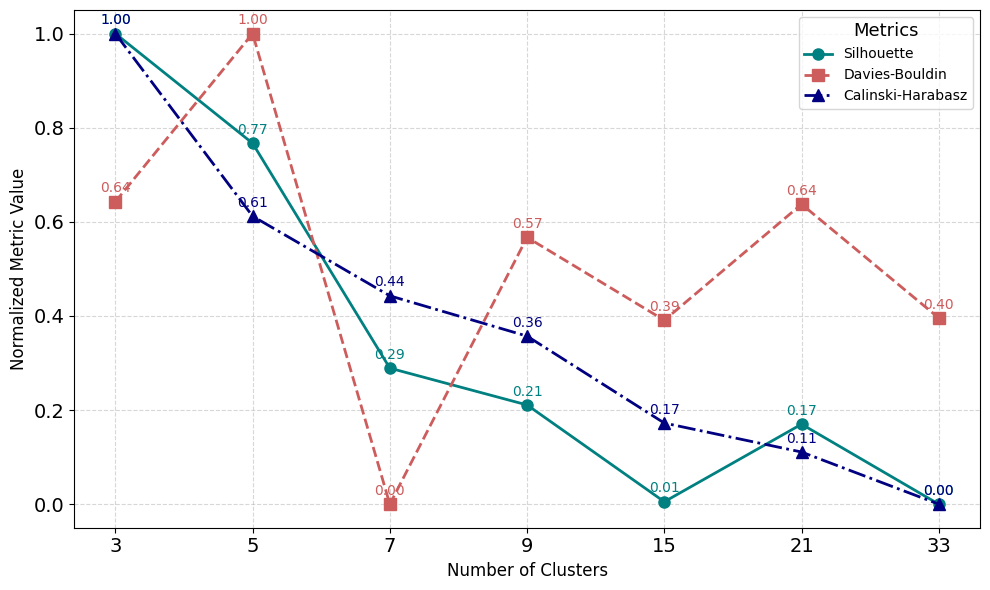

In [3]:
x_labels = [3, 5, 7, 9, 15, 21, 33]
x_indices = range(len(x_labels))

# Definir un esquema de color y estilos
colors = ['teal', 'indianred', 'navy']  # Colores de líneas
markers = ['o', 's', '^']  # Marcadores para cada línea
labels = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
line_styles = ['-', '--', '-.']  # Diferentes estilos de línea

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada línea con su estilo, color y marcador
for i, y_values in enumerate([silhouette_norm, db_norm, ch_norm]):
    plt.plot(x_indices, y_values, label=labels[i], color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Añadir el valor de cada punto sobre la línea, convirtiendo cada valor a float
    for j, value in enumerate(y_values):
        plt.text(x_indices[j], value + 0.02, f'{float(value):.2f}', ha='center', color=colors[i])

# Personalizar las etiquetas del gráfico
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Normalized Metric Value", fontsize=12)
# plt.title("Metrics Comparation", fontsize=14)
plt.xticks(x_indices, x_labels)  # Asignar etiquetas personalizadas al eje X
plt.legend(title="Metrics", fontsize=10, title_fontsize='13')
plt.tick_params(axis='both', which='major', labelsize=14)

# Mejorar el fondo y mostrar el gráfico
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula suave
plt.tight_layout()

plt.savefig("temporal_zamuro/zamuro_clustering_results/Kmeans_Normal/quantitative_results_Kmeans_Normal.pdf", format="pdf")

## Kmeans UMAP RESULTS

In [4]:
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_UMAP/silhouette_n-clusters_33", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_UMAP/DB_n-clusters_33", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_UMAP/CH_n-clusters_33", "rb") as file:
    ch = pkl.load(file)

silhouette_reshape = [[x] for x in silhouette]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
db_reshape = [[x] for x in db]
db_norm = Normalizer().fit_transform(db_reshape)
db_norm = 1-db_norm
ch_reshape = [[x] for x in ch]
ch_norm = Normalizer().fit_transform(ch_reshape)


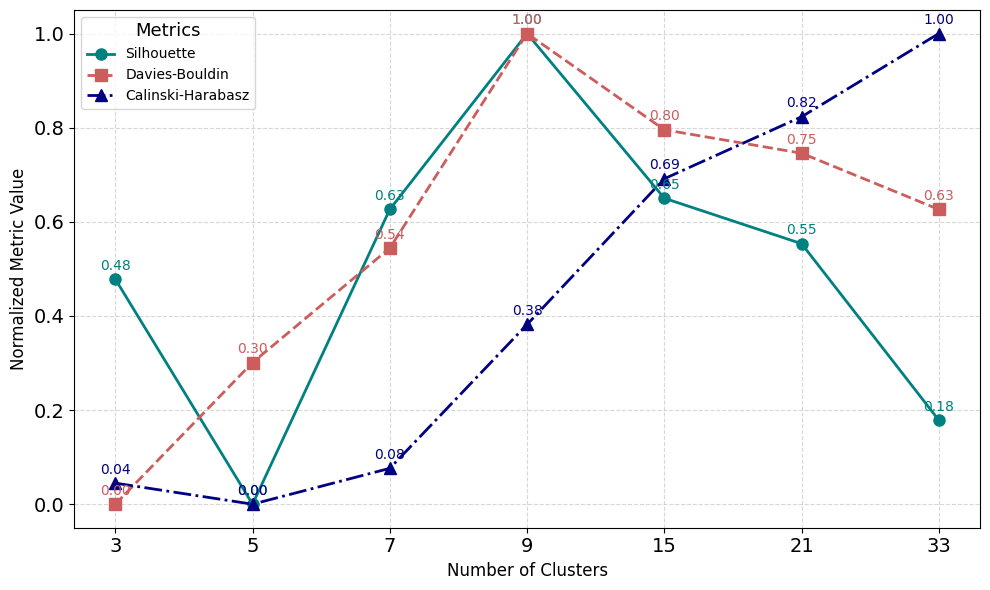

In [5]:
x_labels = [3, 5, 7, 9, 15, 21, 33]
x_indices = range(len(x_labels))

# Definir un esquema de color y estilos
colors = ['teal', 'indianred', 'navy']  # Colores de líneas
markers = ['o', 's', '^']  # Marcadores para cada línea
labels = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
line_styles = ['-', '--', '-.']  # Diferentes estilos de línea

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada línea con su estilo, color y marcador
for i, y_values in enumerate([silhouette_norm, db_norm, ch_norm]):
    plt.plot(x_indices, y_values, label=labels[i], color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Añadir el valor de cada punto sobre la línea, convirtiendo cada valor a float
    for j, value in enumerate(y_values):
        plt.text(x_indices[j], value + 0.02, f'{float(value):.2f}', ha='center', color=colors[i])

# Personalizar las etiquetas del gráfico
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Normalized Metric Value", fontsize=12)
# plt.title("Metrics Comparation", fontsize=14)
plt.xticks(x_indices, x_labels)  # Asignar etiquetas personalizadas al eje X
plt.legend(title="Metrics", fontsize=10, title_fontsize='13')
plt.tick_params(axis='both', which='major', labelsize=14)


# Mejorar el fondo y mostrar el gráfico
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula suave
plt.tight_layout()

plt.savefig("temporal_zamuro/zamuro_clustering_results/Kmeans_UMAP/quantitative_results_Kmeans_UMAP.pdf", format="pdf")

## Kmeans Pacmap results

In [6]:
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_PacMap/silhouette_n-clusters_33", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_PacMap/DB_n-clusters_33", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/Kmeans_PacMap/CH_n-clusters_33", "rb") as file:
    ch = pkl.load(file)

silhouette_reshape = [[x] for x in silhouette]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
db_reshape = [[x] for x in db]
db_norm = Normalizer().fit_transform(db_reshape)
db_norm = 1-db_norm
ch_reshape = [[x] for x in ch]
ch_norm = Normalizer().fit_transform(ch_reshape)

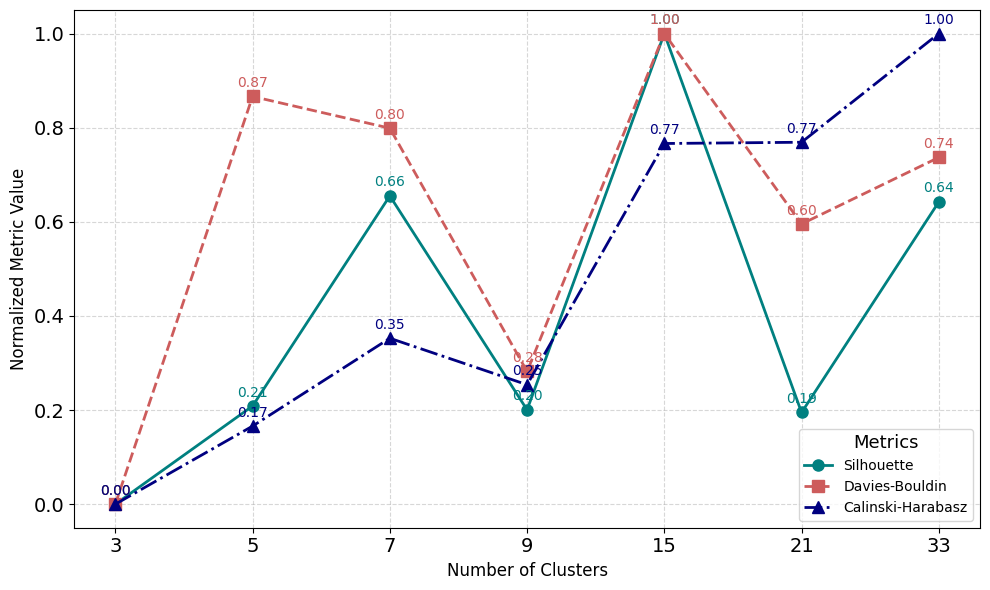

In [7]:
x_labels = [3, 5, 7, 9, 15, 21, 33]
x_indices = range(len(x_labels))

# Definir un esquema de color y estilos
colors = ['teal', 'indianred', 'navy']  # Colores de líneas
markers = ['o', 's', '^']  # Marcadores para cada línea
labels = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
line_styles = ['-', '--', '-.']  # Diferentes estilos de línea

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada línea con su estilo, color y marcador
for i, y_values in enumerate([silhouette_norm, db_norm, ch_norm]):
    plt.plot(x_indices, y_values, label=labels[i], color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Añadir el valor de cada punto sobre la línea, convirtiendo cada valor a float
    for j, value in enumerate(y_values):
        plt.text(x_indices[j], value + 0.02, f'{float(value):.2f}', ha='center', color=colors[i])

# Personalizar las etiquetas del gráfico
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Normalized Metric Value", fontsize=12)
# plt.title("Metrics Comparation", fontsize=14)
plt.xticks(x_indices, x_labels)  # Asignar etiquetas personalizadas al eje X
plt.legend(title="Metrics", fontsize=10, title_fontsize='13')
plt.tick_params(axis='both', which='major', labelsize=14)

# Mejorar el fondo y mostrar el gráfico
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula suave

plt.tight_layout()

plt.savefig("temporal_zamuro/zamuro_clustering_results/Kmeans_PacMap/quantitative_results_Kmeans_PacMap.pdf", format="pdf")

## DBSCAN Normal

In [8]:
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_Normal/silhouette_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_Normal/DB_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_Normal/CH_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    ch = pkl.load(file)

silhouette_array = np.asarray(list(silhouette.items()))
silhouette_reshape = silhouette_array[:,1]
silhouette_reshape = [[x] for x in silhouette_reshape]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
silhouette_norm  = silhouette_norm.reshape(silhouette_norm.shape[0])
db_array = np.asarray(list(db.items()))
db_reshape = db_array[:,1]
db_reshape = [[x] for x in db_reshape]
db_norm = Normalizer().fit_transform(db_reshape)
db_norm  = db_norm.reshape(db_norm.shape[0])
db_norm = 1-db_norm
ch_array = np.asarray(list(ch.items()))
ch_reshape = ch_array[:,1]
ch_reshape = [[x] for x in ch_reshape]
ch_norm = Normalizer().fit_transform(ch_reshape)
ch_norm  = ch_norm.reshape(ch_norm.shape[0])

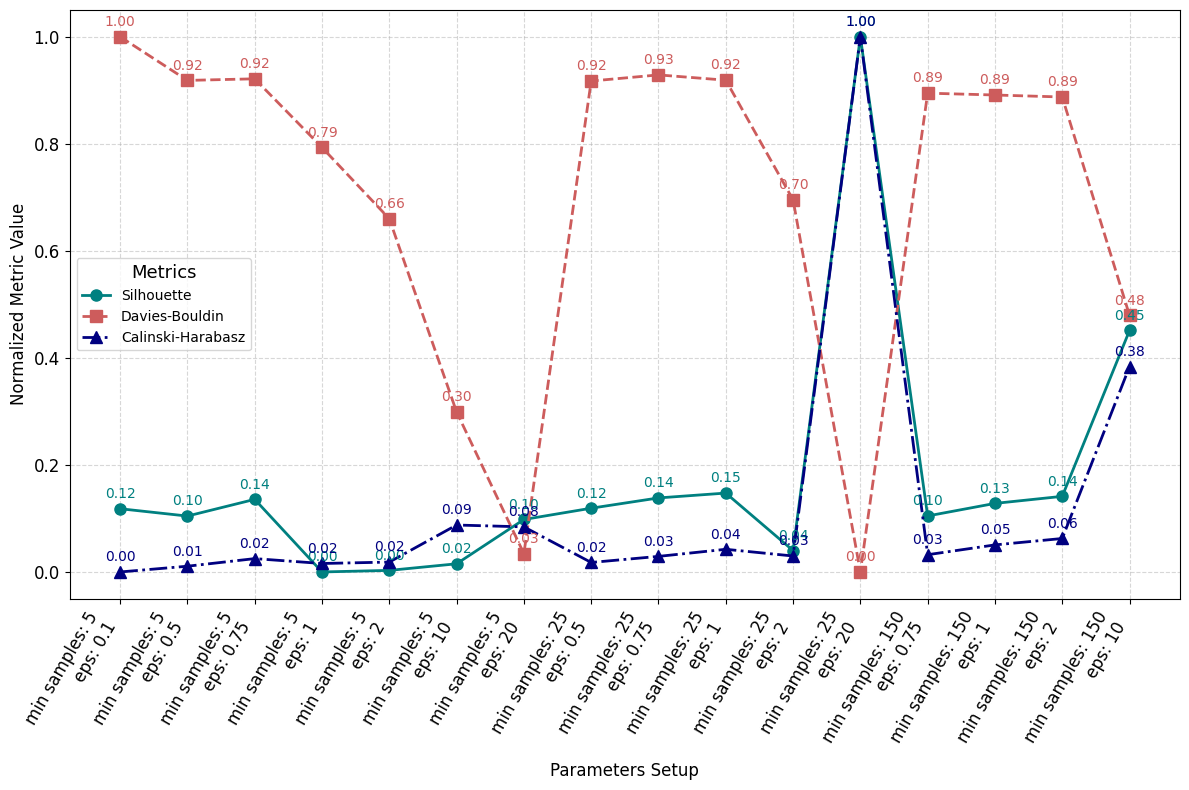

In [9]:
# Extraer las claves del diccionario
x_labels = list(db.keys())

# Formatear las claves correctamente
x_labels= [
    key.replace("eps_", "eps: ").replace("min_samples", "min samples: ")
    for key in x_labels
]

x_labels_formatted = [
    f"min samples: {key.split('_')[2]}\n {key.split('_')[0]}" 
    for key in x_labels
]

x_indices = range(len(x_labels))  # Índices para las posiciones de los xticks

# Definir un esquema de color y estilos
colors = ['teal', 'indianred', 'navy']  # Colores de líneas
markers = ['o', 's', '^']  # Marcadores para cada línea
labels = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
line_styles = ['-', '--', '-.']  # Diferentes estilos de línea

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Graficar cada línea con su estilo, color y marcador
for i, y_values in enumerate([silhouette_norm, db_norm, ch_norm]):
    plt.plot(x_indices, y_values, label=labels[i], color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Añadir el valor de cada punto sobre la línea, convirtiendo cada valor a float
    for j, value in enumerate(y_values):
        plt.text(x_indices[j], value + 0.02, f'{float(value):.2f}', ha='center', color=colors[i])

# Personalizar las etiquetas del gráfico
plt.xlabel("Parameters Setup", fontsize=12)
plt.ylabel("Normalized Metric Value", fontsize=12)
# plt.title("Metrics Comparison", fontsize=14)
plt.xticks(x_indices, x_labels_formatted, rotation=60, ha='right')  # Etiquetas personalizadas al eje X
plt.legend(title="Metrics", fontsize=10, title_fontsize='13')
plt.tick_params(axis='both', which='major', labelsize=12)

# Mejorar el fondo y mostrar el gráfico
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula suave
plt.tight_layout()  # Asegurar que no haya superposición de elementos

plt.savefig("temporal_zamuro/zamuro_clustering_results/DBSCAN_Normal/quantitative_results_DBSCAN_Normal.pdf", format="pdf")

plt.show()

## DBSCAN UMAP Results

In [10]:
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_UMAP/silhouette_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_UMAP/DB_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_UMAP/CH_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    ch = pkl.load(file)

silhouette_array = np.asarray(list(silhouette.items()))
silhouette_reshape = silhouette_array[:,1]
silhouette_reshape = [[x] for x in silhouette_reshape]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
silhouette_norm  = silhouette_norm.reshape(silhouette_norm.shape[0])
db_array = np.asarray(list(db.items()))
db_reshape = db_array[:,1]
db_reshape = [[x] for x in db_reshape]
db_norm = Normalizer().fit_transform(db_reshape)
db_norm  = db_norm.reshape(db_norm.shape[0])
db_norm = 1-db_norm
ch_array = np.asarray(list(ch.items()))
ch_reshape = ch_array[:,1]
ch_reshape = [[x] for x in ch_reshape]
ch_norm = Normalizer().fit_transform(ch_reshape)
ch_norm  = ch_norm.reshape(ch_norm.shape[0])

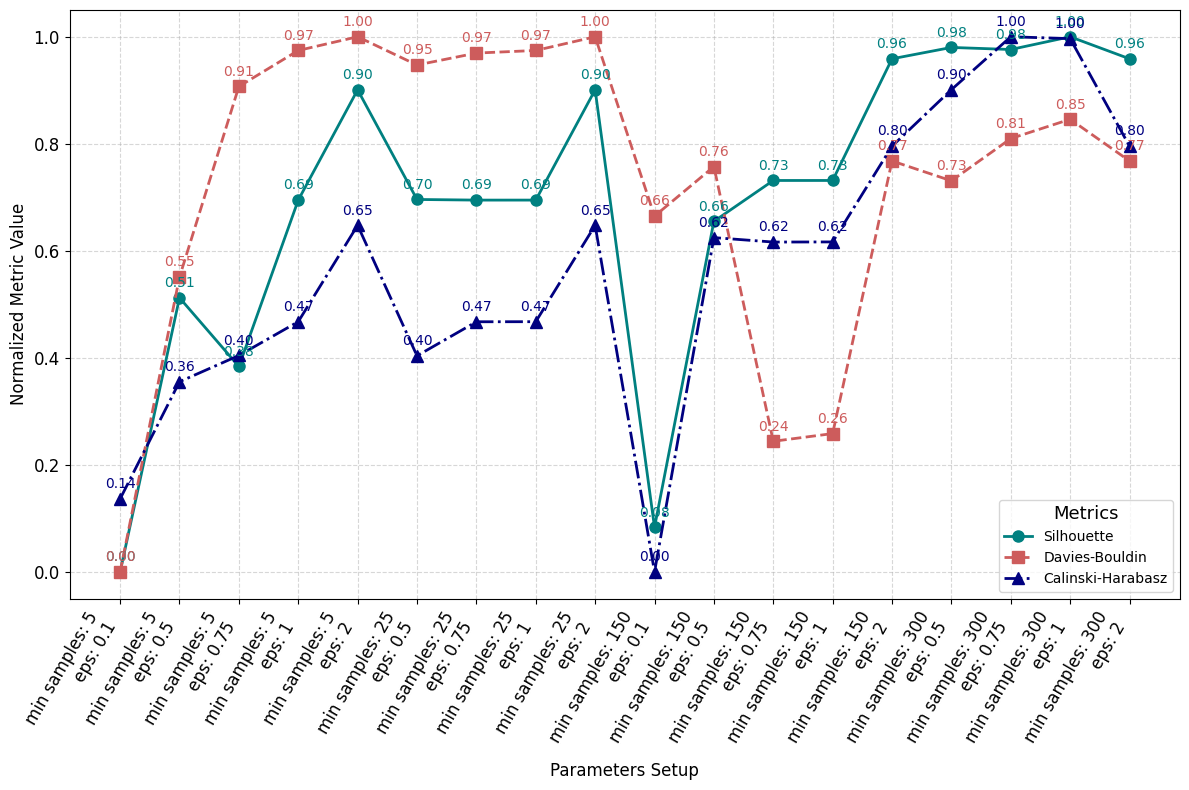

In [11]:
# Extraer las claves del diccionario
x_labels = list(db.keys())

# Formatear las claves correctamente
x_labels= [
    key.replace("eps_", "eps: ").replace("min_samples", "min samples: ")
    for key in x_labels
]

x_labels_formatted = [
    f"min samples: {key.split('_')[2]}\n {key.split('_')[0]}" 
    for key in x_labels
]

x_indices = range(len(x_labels))  # Índices para las posiciones de los xticks

# Definir un esquema de color y estilos
colors = ['teal', 'indianred', 'navy']  # Colores de líneas
markers = ['o', 's', '^']  # Marcadores para cada línea
labels = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
line_styles = ['-', '--', '-.']  # Diferentes estilos de línea

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Graficar cada línea con su estilo, color y marcador
for i, y_values in enumerate([silhouette_norm, db_norm, ch_norm]):
    plt.plot(x_indices, y_values, label=labels[i], color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Añadir el valor de cada punto sobre la línea, convirtiendo cada valor a float
    for j, value in enumerate(y_values):
        plt.text(x_indices[j], value + 0.02, f'{float(value):.2f}', ha='center', color=colors[i])

# Personalizar las etiquetas del gráfico
plt.xlabel("Parameters Setup", fontsize=12)
plt.ylabel("Normalized Metric Value", fontsize=12)
# plt.title("Metrics Comparison", fontsize=14)
plt.xticks(x_indices, x_labels_formatted, rotation=60, ha='right')  # Etiquetas personalizadas al eje X
plt.legend(title="Metrics", fontsize=10, title_fontsize='13')
plt.tick_params(axis='both', which='major', labelsize=12)

# Mejorar el fondo y mostrar el gráfico
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula suave
plt.tight_layout()  # Asegurar que no haya superposición de elementos

plt.savefig("temporal_zamuro/zamuro_clustering_results/DBSCAN_UMAP/quantitative_results_DBSCAN_UMAP.pdf", format="pdf")

plt.show()

## DBSCAN PacMap Results

In [15]:
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_PacMap/silhouette_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_PacMap/DB_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_PacMap/CH_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    ch = pkl.load(file)

silhouette_array = np.asarray(list(silhouette.items()))
silhouette_reshape = silhouette_array[:,1]
silhouette_reshape = [[x] for x in silhouette_reshape]
silhouette_norm = Normalizer().fit_transform(silhouette_reshape)
silhouette_norm  = silhouette_norm.reshape(silhouette_norm.shape[0])
db_array = np.asarray(list(db.items()))
db_reshape = db_array[:,1]
db_reshape = [[x] for x in db_reshape]
db_norm = Normalizer().fit_transform(db_reshape)
db_norm  = db_norm.reshape(db_norm.shape[0])
db_norm = 1-db_norm
ch_array = np.asarray(list(ch.items()))
ch_reshape = ch_array[:,1]
ch_reshape = [[x] for x in ch_reshape]
ch_norm = Normalizer().fit_transform(ch_reshape)
ch_norm  = ch_norm.reshape(ch_norm.shape[0])

In [16]:
silhouette

{'eps_0.5_min_samples_5': -0.44025806,
 'eps_0.75_min_samples_5': -0.11039683,
 'eps_1_min_samples_5': -0.11005918,
 'eps_2_min_samples_5': -0.11237999,
 'eps_0.1_min_samples_25': -0.4089848,
 'eps_0.75_min_samples_25': -0.41529262,
 'eps_1_min_samples_25': -0.22602242,
 'eps_2_min_samples_25': -0.107688785,
 'eps_0.75_min_samples_150': -0.5225063,
 'eps_2_min_samples_150': -0.11210493,
 'eps_2_min_samples_300': 0.13197358}

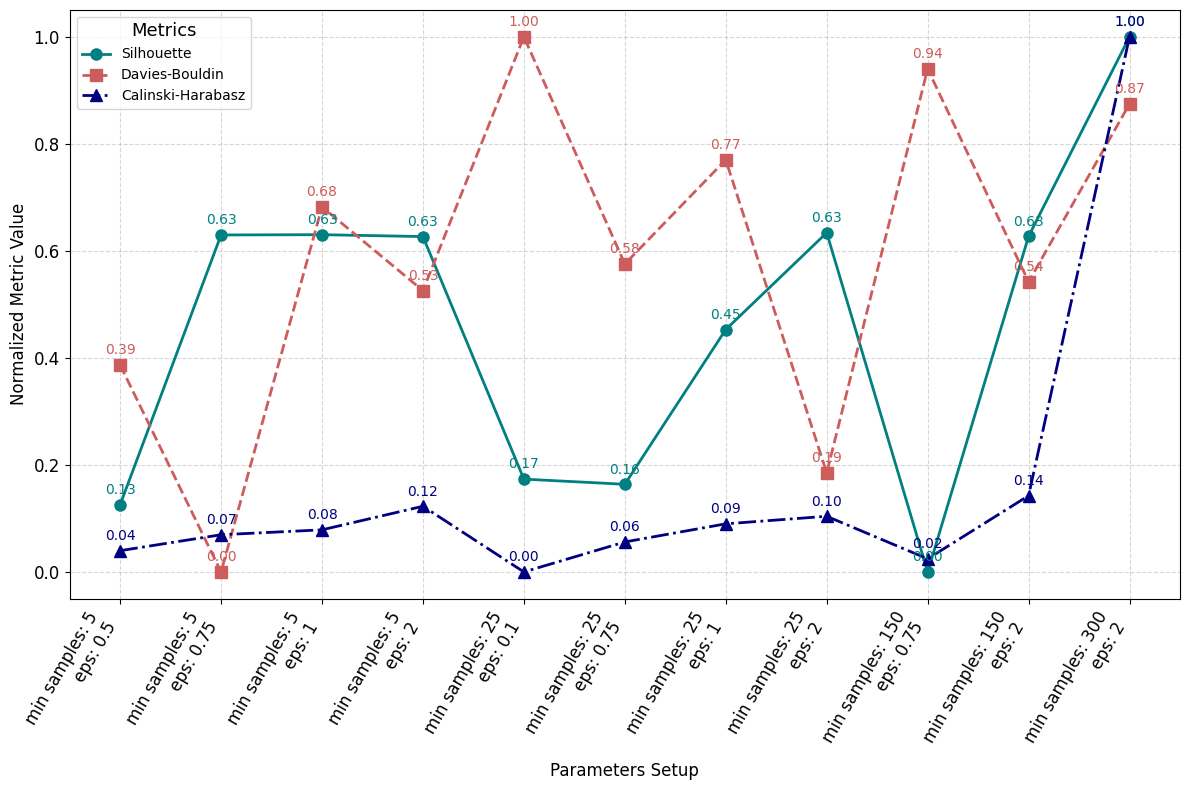

In [13]:
# Extraer las claves del diccionario
x_labels = list(db.keys())

# Formatear las claves correctamente
x_labels= [
    key.replace("eps_", "eps: ").replace("min_samples", "min samples: ")
    for key in x_labels
]

x_labels_formatted = [
    f"min samples: {key.split('_')[2]}\n {key.split('_')[0]}" 
    for key in x_labels
]

x_indices = range(len(x_labels))  # Índices para las posiciones de los xticks

# Definir un esquema de color y estilos
colors = ['teal', 'indianred', 'navy']  # Colores de líneas
markers = ['o', 's', '^']  # Marcadores para cada línea
labels = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
line_styles = ['-', '--', '-.']  # Diferentes estilos de línea

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Graficar cada línea con su estilo, color y marcador
for i, y_values in enumerate([silhouette_norm, db_norm, ch_norm]):
    plt.plot(x_indices, y_values, label=labels[i], color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=8, linewidth=2)
    
    # Añadir el valor de cada punto sobre la línea, convirtiendo cada valor a float
    for j, value in enumerate(y_values):
        plt.text(x_indices[j], value + 0.02, f'{float(value):.2f}', ha='center', color=colors[i])

# Personalizar las etiquetas del gráfico
plt.xlabel("Parameters Setup", fontsize=12)
plt.ylabel("Normalized Metric Value", fontsize=12)
# plt.title("Metrics Comparison", fontsize=14)
plt.xticks(x_indices, x_labels_formatted, rotation=60, ha='right')  # Etiquetas personalizadas al eje X
plt.legend(title="Metrics", fontsize=10, title_fontsize='13')
plt.tick_params(axis='both', which='major', labelsize=12)

# Mejorar el fondo y mostrar el gráfico
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Añadir una cuadrícula suave
plt.tight_layout()  # Asegurar que no haya superposición de elementos

plt.savefig("temporal_zamuro/zamuro_clustering_results/DBSCAN_PacMap/quantitative_results_DBSCAN_PacMap.pdf", format="pdf")

plt.show()

## HDBSCAN Normal Results

In [14]:
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_PacMap/silhouette_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    silhouette = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_PacMap/DB_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    db = pkl.load(file)
    
with open(f"temporal_zamuro/zamuro_clustering_results/DBSCAN_PacMap/CH_eps_[0.1, 0.5, 0.75, 1, 2, 10, 20]_min_samples_[5, 25, 150, 300]", "rb") as file:
    ch = pkl.load(file)